INFORMATION ON THE DATASET

The dataset consists of information on business web customer visitors.  The dataset has a total of 18 features.

The target variable is "Revenue". Our goal is to learn "Revenue" in terms of important features and to be able to accurately predict revenue based on the features and work that we complete.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the information measured by "Google Analytics" for each page in the business site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests during that session. 

The value of "Exit Rate" feature for a specific web page is calculated for all pageviews to the page as the percentage that were the lost in the session. 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day). Explanation:  The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



In [233]:
# imports and dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('business_web_customers.csv')

# shape
data.shape

(12330, 18)

In [234]:
# inspect data

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [235]:
# description of attributes (statistical)

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [236]:
#  datatypes

data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [237]:
# information on the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [238]:
# verification of nulls

data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [239]:
# checing the distribution of revenue

data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

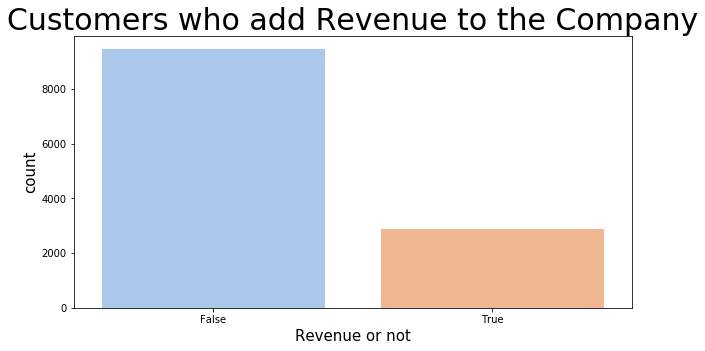

In [240]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Customers who add Revenue to the Company', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [241]:

#  checking the distribution of Weekend

data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

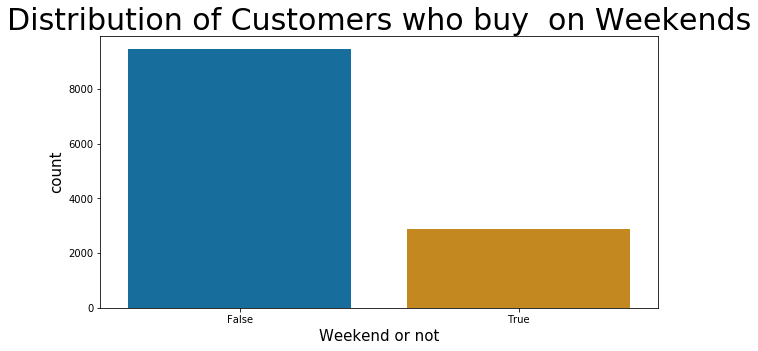

In [242]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Weekend'], palette = 'colorblind')
plt.title('Distribution of Customers who buy  on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [243]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

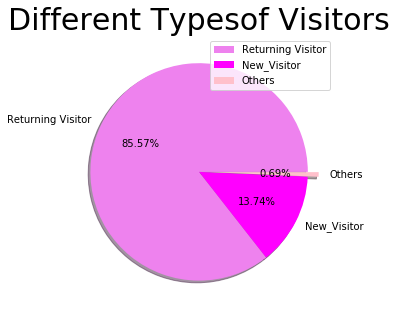

In [244]:
# plotting a pie chart for browsers

size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Typesof Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

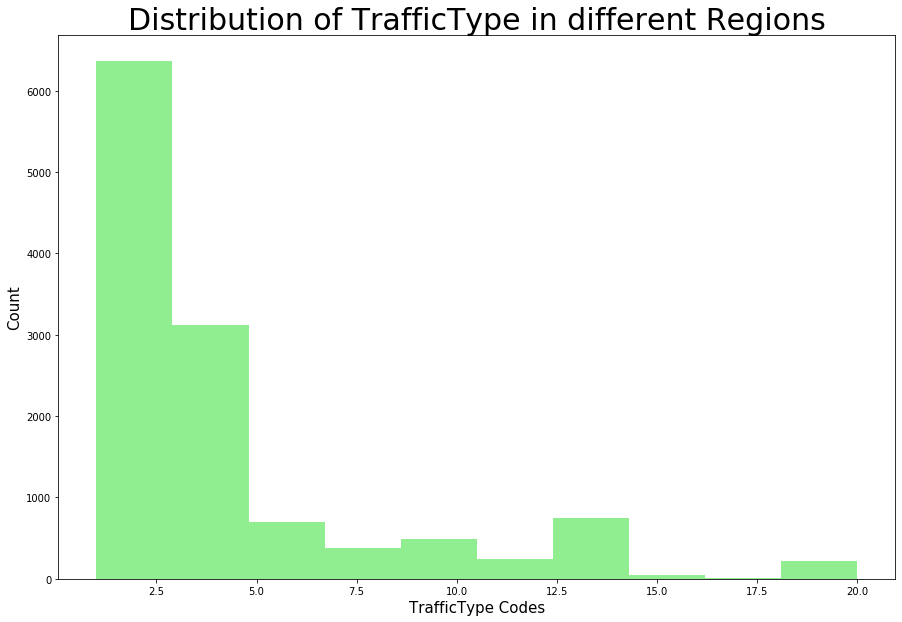

In [245]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(data['TrafficType'], color = 'lightgreen')
plt.title('Distribution of TrafficType in different Regions',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

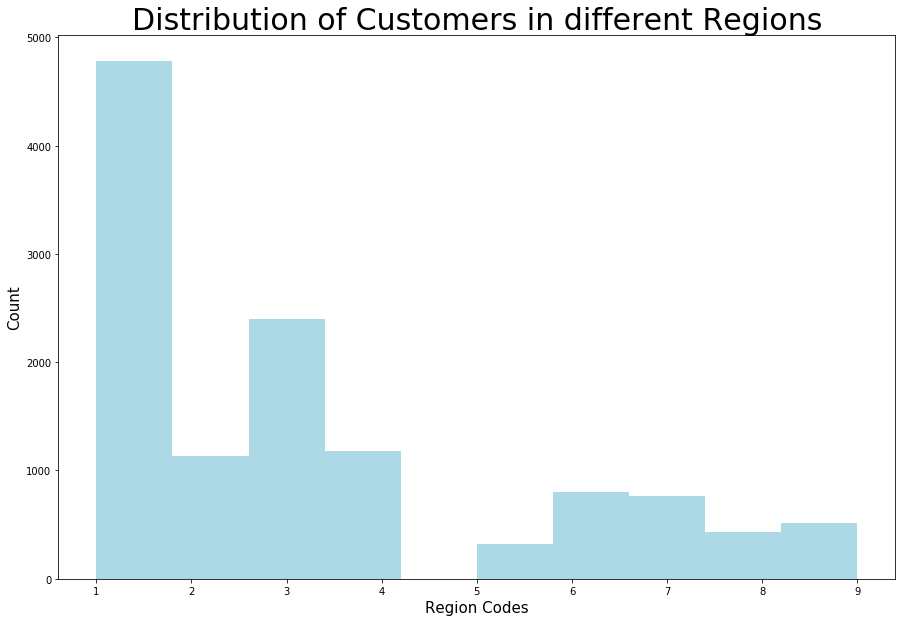

In [246]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers in different Regions',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [247]:
# checking different no. of browsers they use for shopping

data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

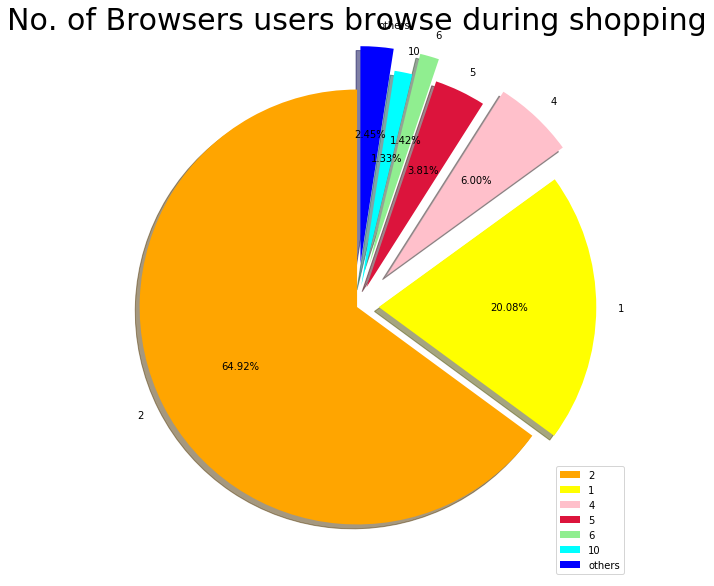

In [248]:
# plotting a pie chart for browsers

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
explode = [0, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('No. of Browsers users browse during shopping', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [249]:
# checking the no. of Operating Systems for each user

data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

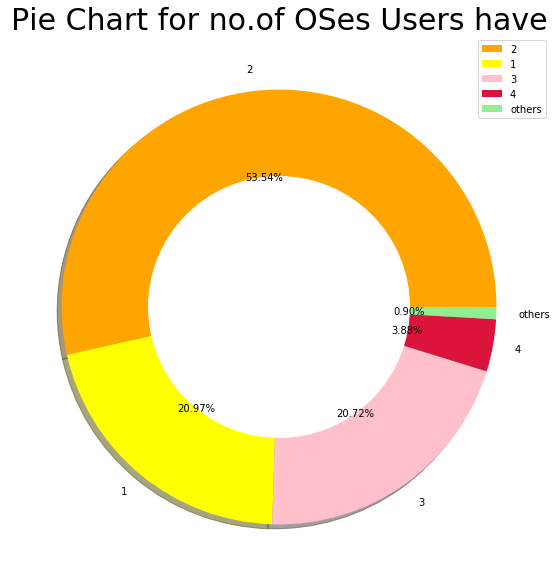

In [250]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for no.of OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [251]:
#checking months

data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

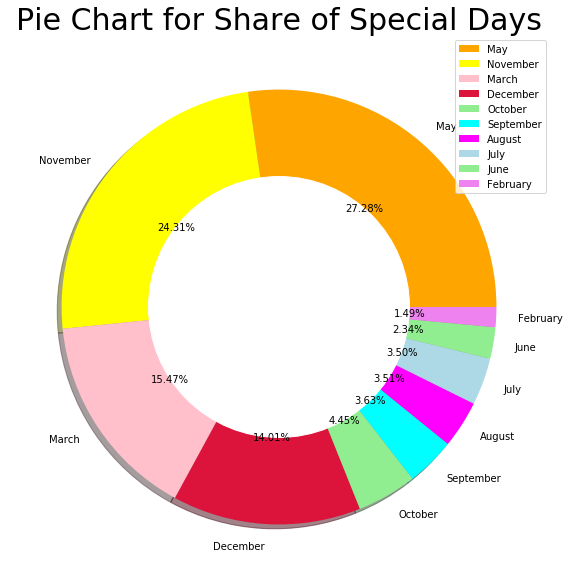

In [252]:
# creating a donut chart for the months variations'

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for Share of Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [253]:
# looking at the probabilities of special day

data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

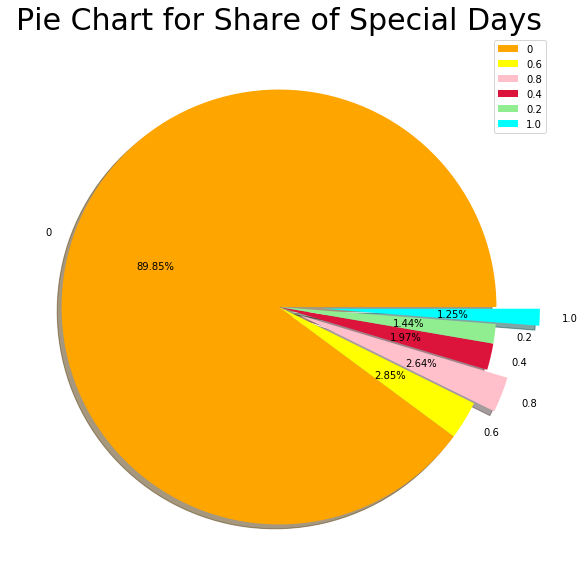

In [254]:
# plotting a pie chart for share of special days

size = [11079, 351, 325, 243, 178, 154]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan']
labels = "0", "0.6", "0.8", "0.4", "0.2", "1.0"
explode = [0, 0, 0.1, 0, 0, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for Share of Special Days', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

C:\Users\SINDHURA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


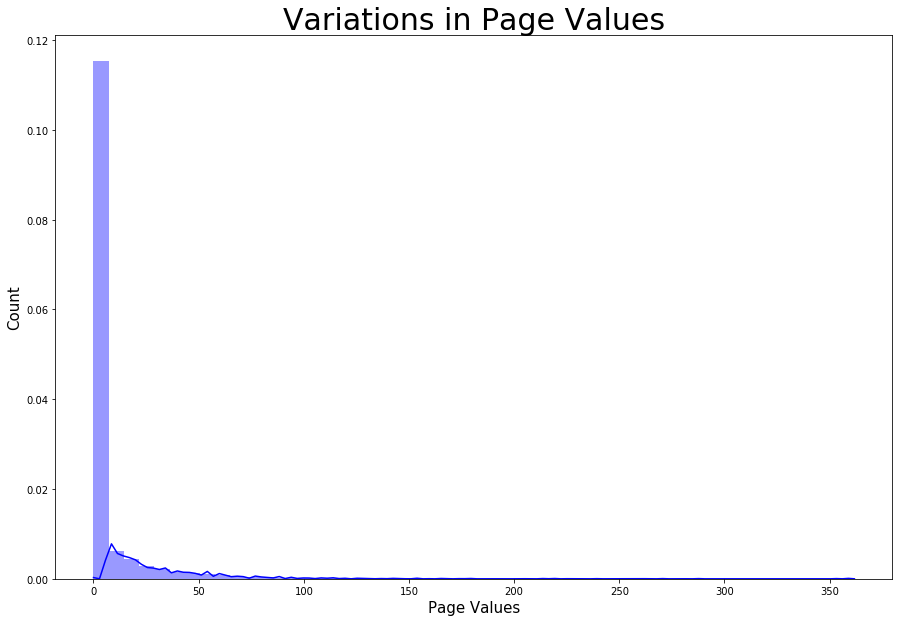

In [255]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['PageValues'], color = 'blue')
plt.title('Variations in Page Values', fontsize = 30)
plt.xlabel('Page Values', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

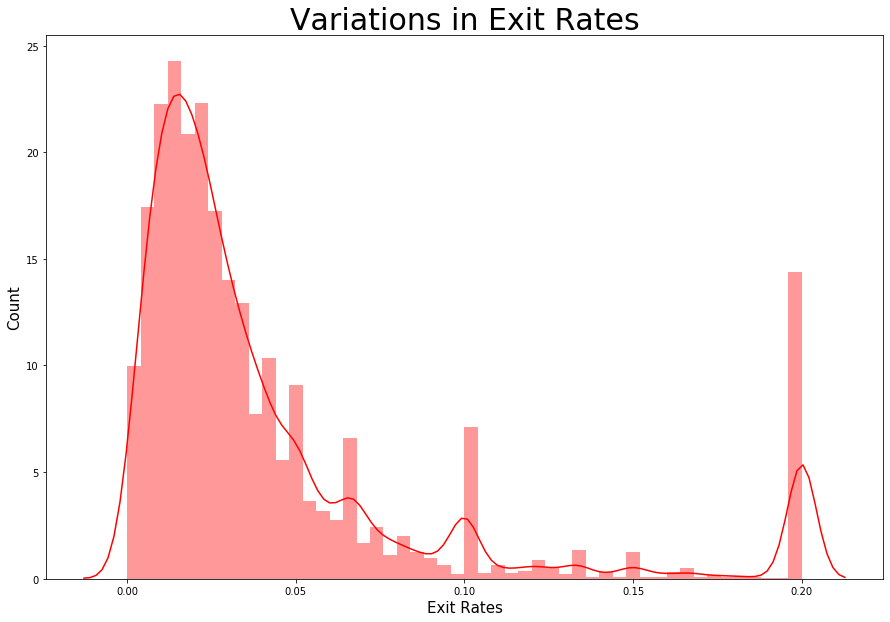

In [256]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ExitRates'], color = 'red')
plt.title('Variations in Exit Rates', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

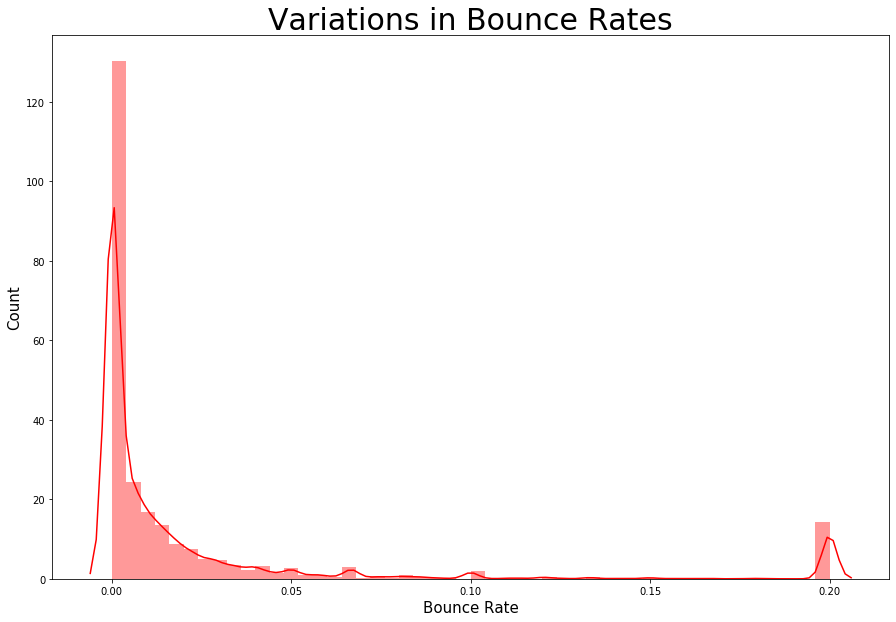

In [257]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['BounceRates'], color = 'red')
plt.title('Variations in Bounce Rates', fontsize = 30)
plt.xlabel('Bounce Rate', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

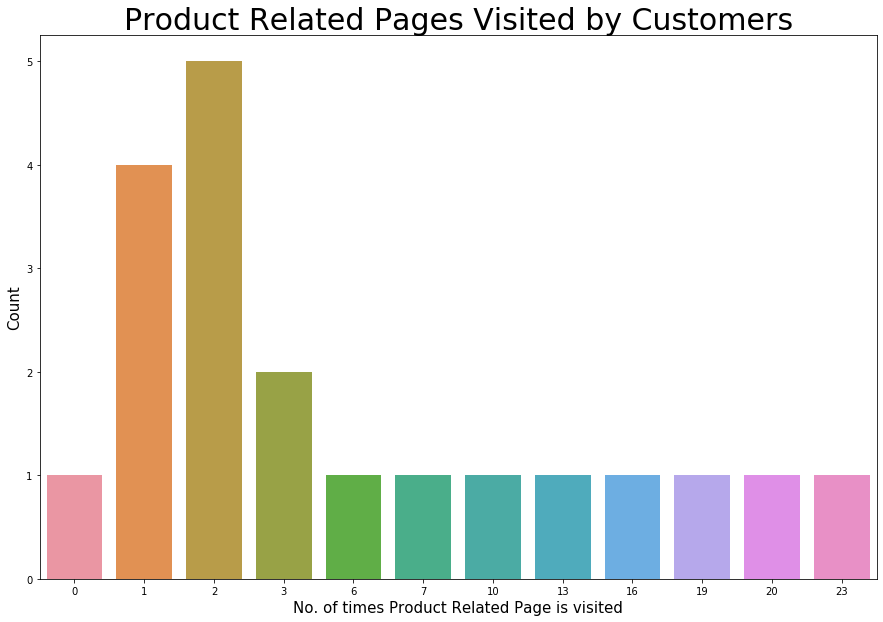

In [258]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data['ProductRelated'].head(20))
plt.title('Product Related Pages Visited by Customers', fontsize = 30)
plt.xlabel('No. of times Product Related Page is visited', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

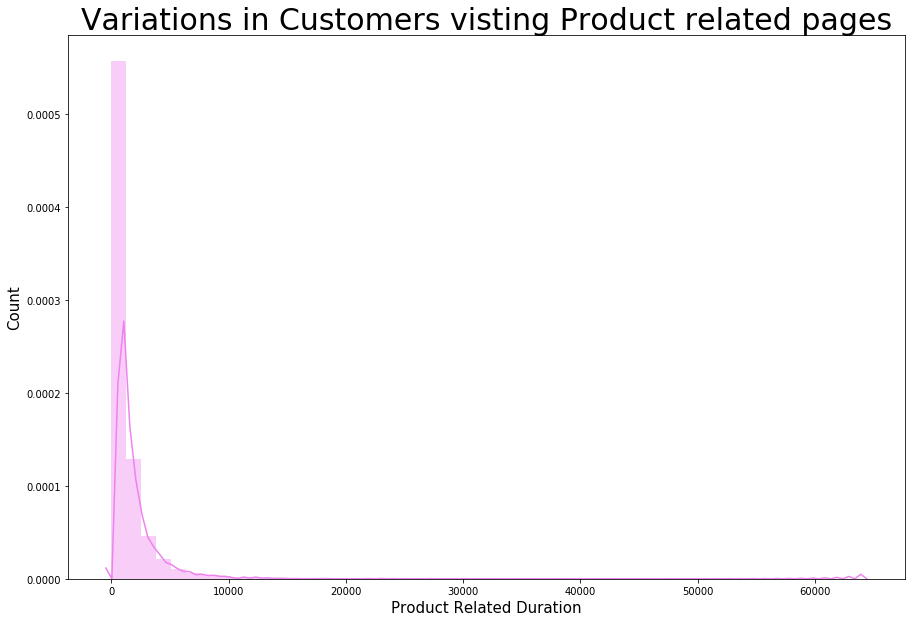

In [259]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ProductRelated_Duration'], color = 'violet')
plt.title('Variations in Customers visting Product related pages', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

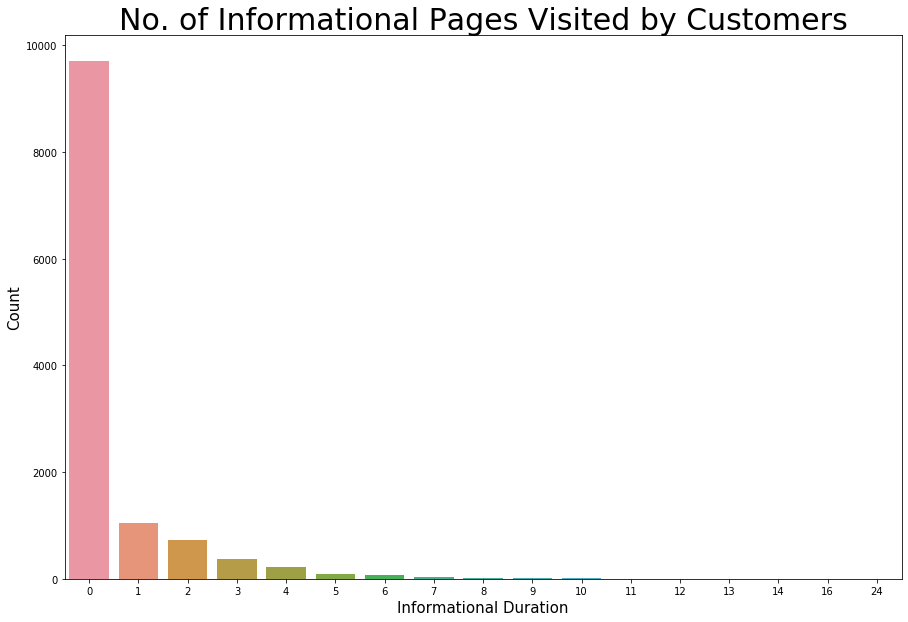

In [260]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data['Informational'])
plt.title('No. of Informational Pages Visited by Customers', fontsize = 30)
plt.xlabel('Informational Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

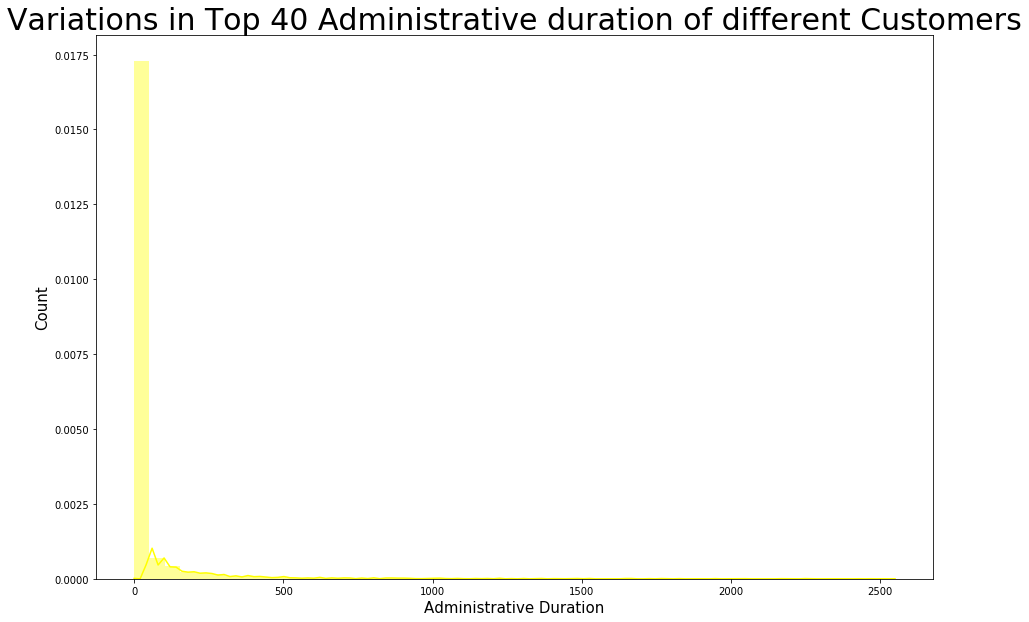

In [261]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['Informational_Duration'], color = 'yellow')
plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

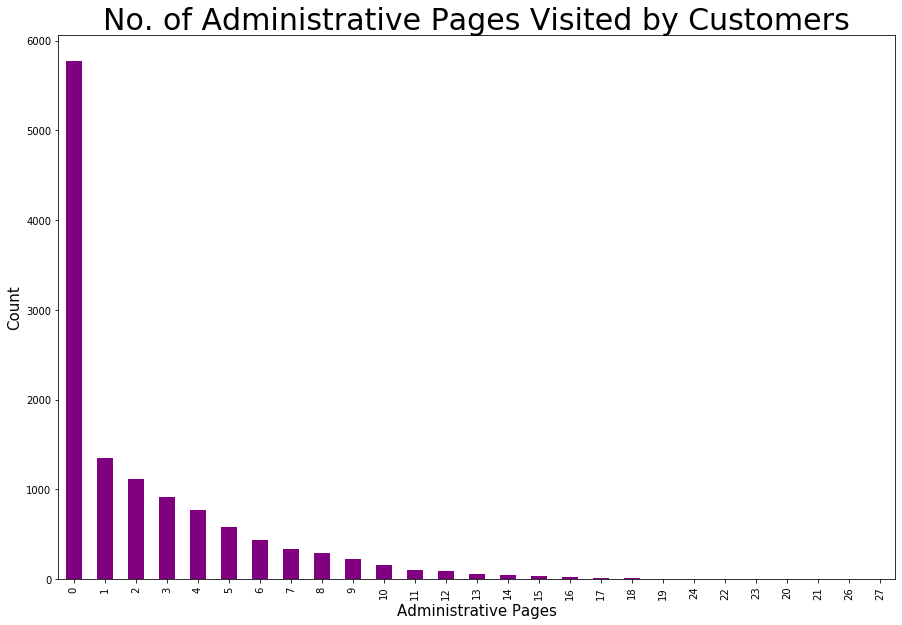

In [262]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
data['Administrative'].value_counts().plot.bar(color = 'purple')
plt.title('No. of Administrative Pages Visited by Customers', fontsize = 30)
plt.xlabel('Administrative Pages', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

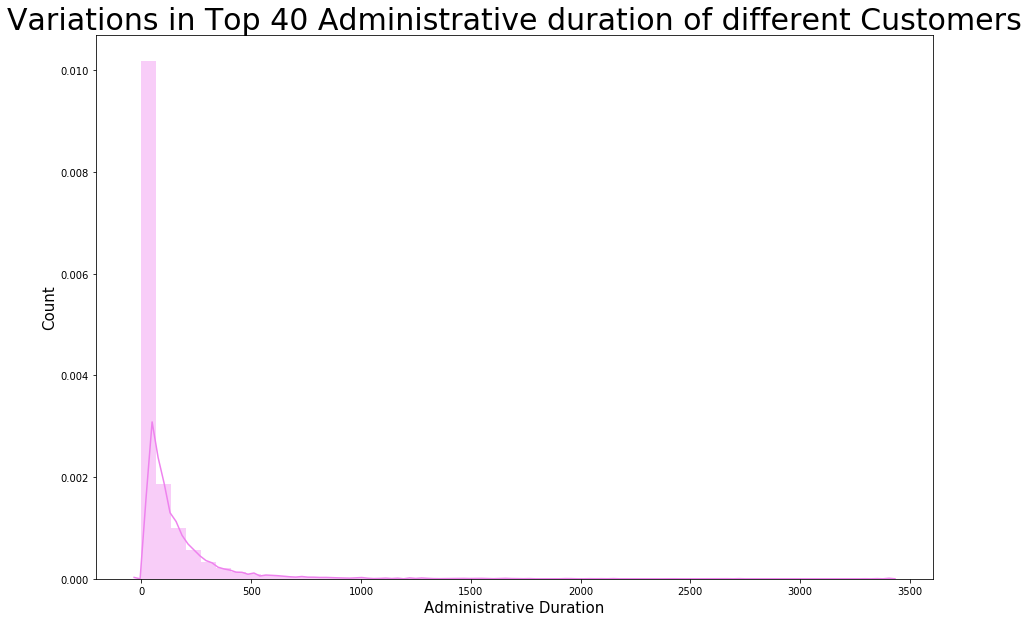

In [263]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['Administrative_Duration'], color = 'violet')
plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

**Bi-Variate Analysis**

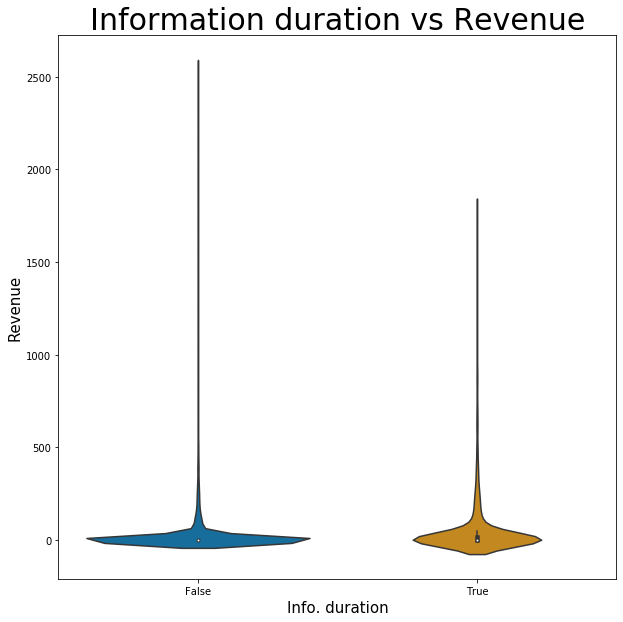

In [264]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['Informational_Duration'], palette = 'colorblind')
plt.title('Information duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


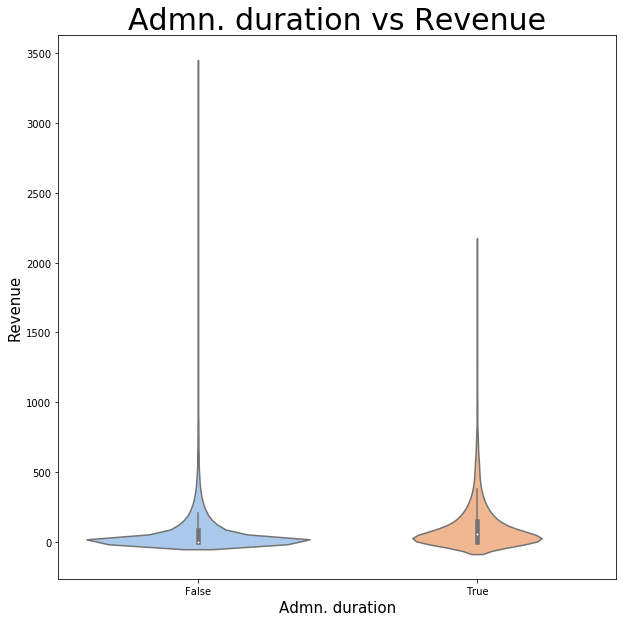

In [265]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


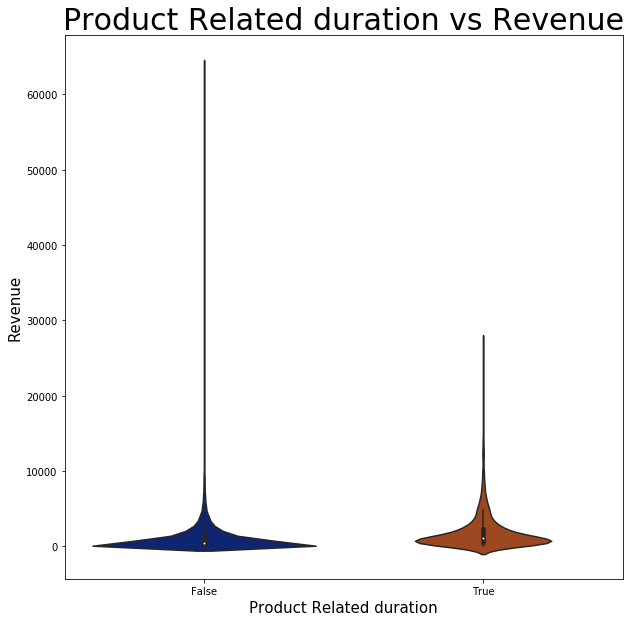

In [266]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


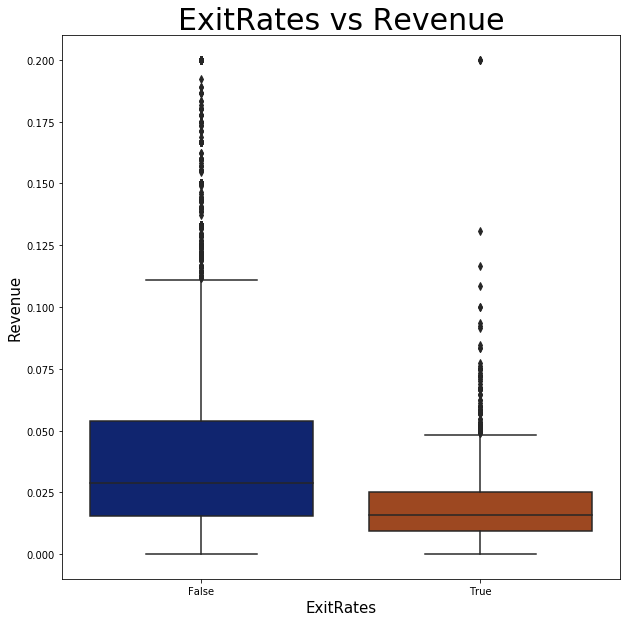

In [267]:
# exit rate vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['ExitRates'], palette = 'dark')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


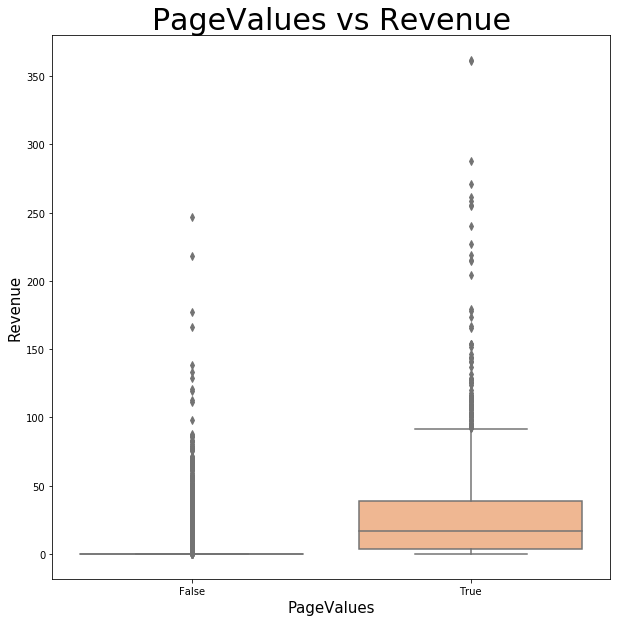

In [268]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['PageValues'], palette = 'pastel')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

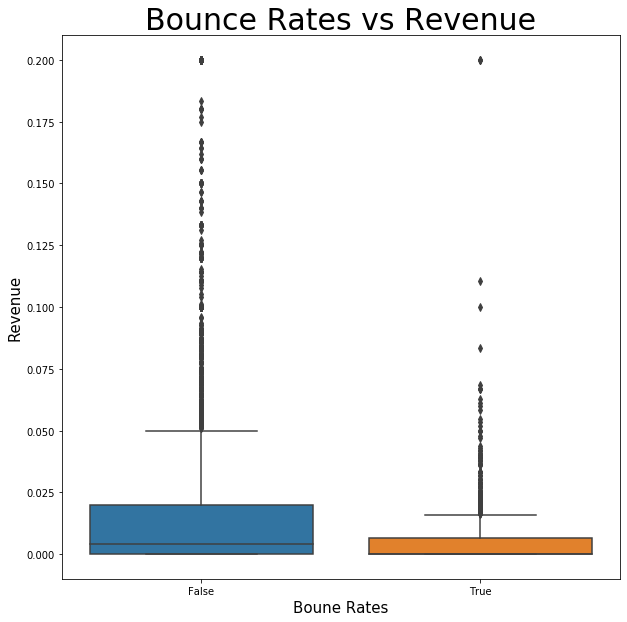

In [269]:

# bounce rates vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['BounceRates'])
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

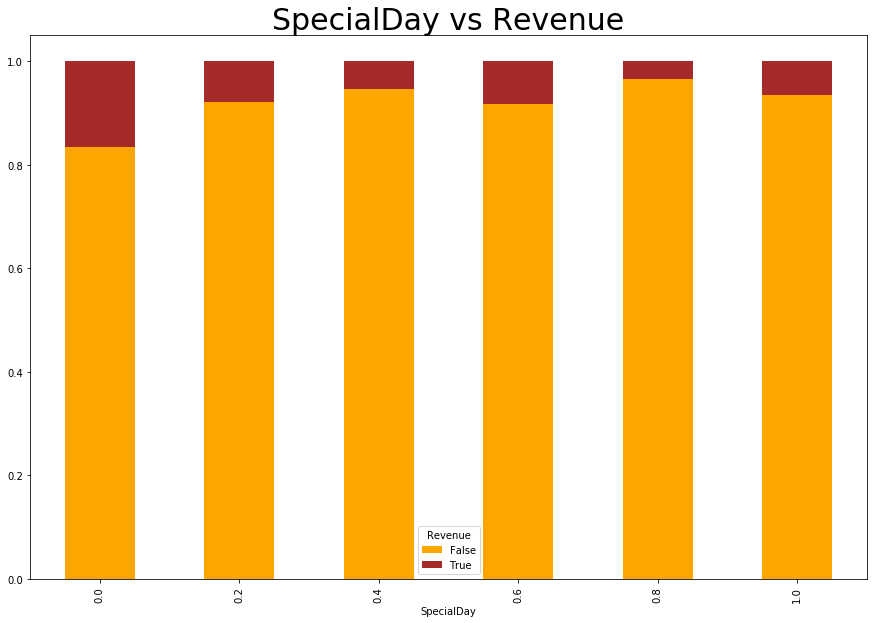

In [270]:
# specialday vs revenue

df = pd.crosstab(data['SpecialDay'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['orange', 'brown'])
plt.title('SpecialDay vs Revenue', fontsize = 30)
plt.show()

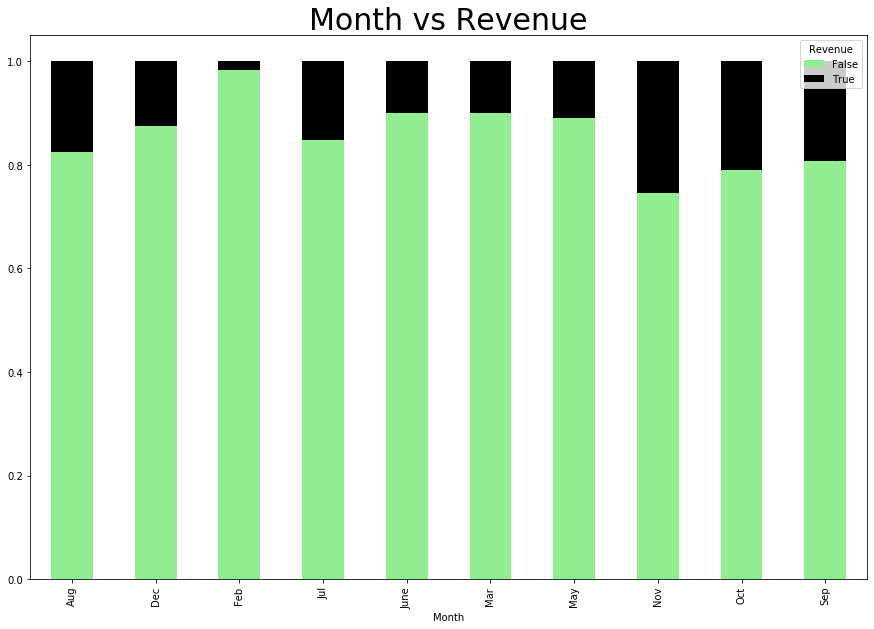

In [271]:
# months vs revenue

df = pd.crosstab(data['Month'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightgreen', 'black'])
plt.title('Month vs Revenue', fontsize = 30)
plt.show()

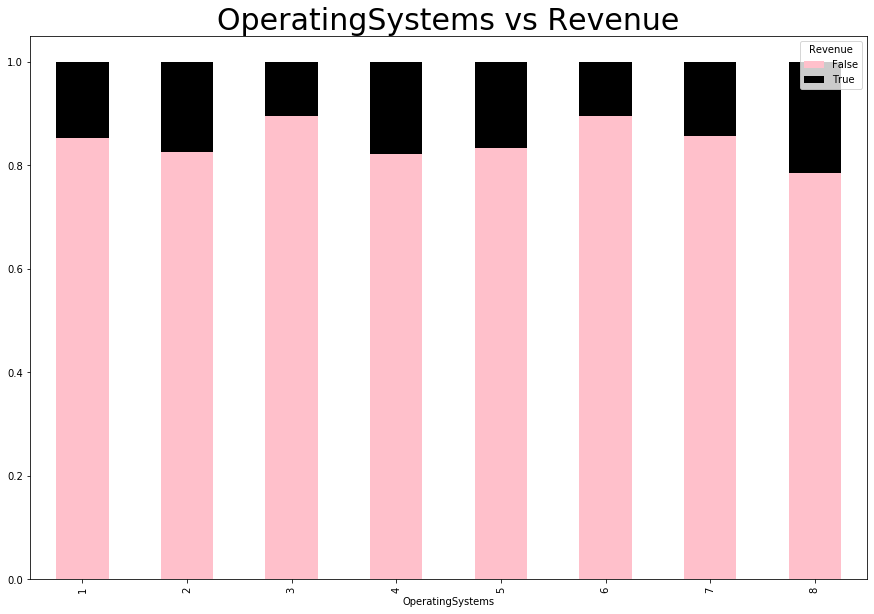

In [272]:
# operating system vs Revenue

df = pd.crosstab(data['OperatingSystems'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['pink', 'black'])
plt.title('OperatingSystems vs Revenue', fontsize = 30)
plt.show()

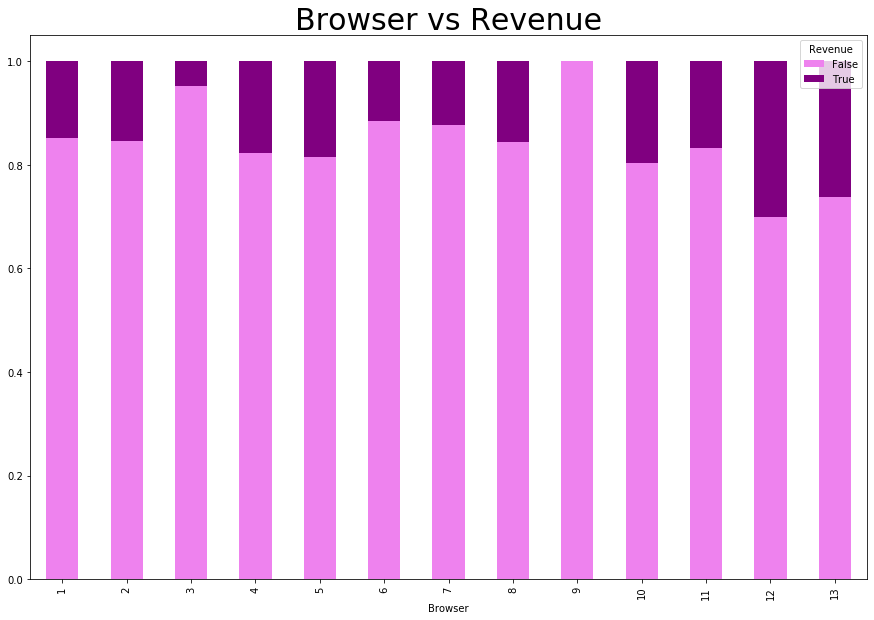

In [273]:
# browser vs Revenue

df = pd.crosstab(data['Browser'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['violet', 'Purple'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

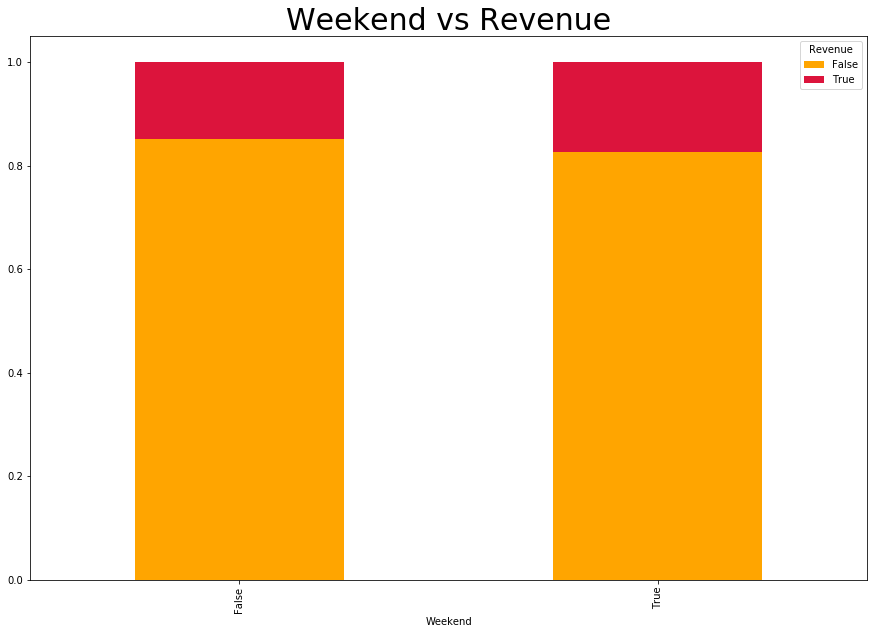

In [274]:
# weekend vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

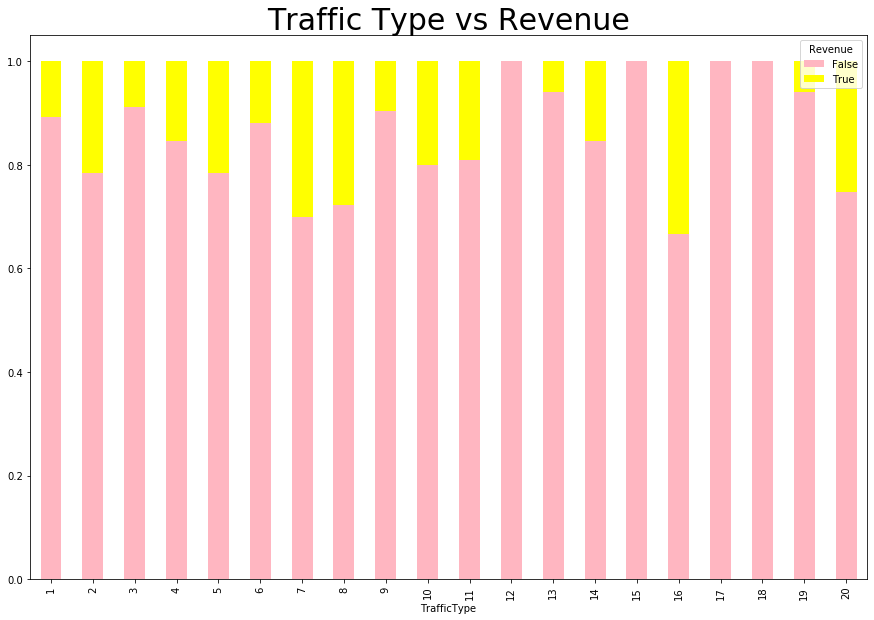

In [275]:
# Traffic Type vs Revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

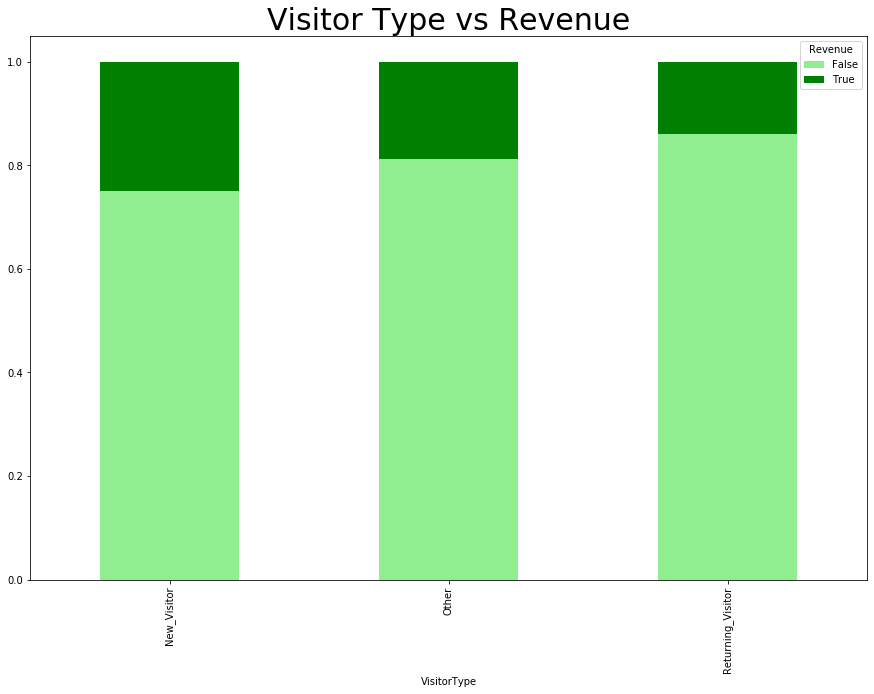

In [276]:
# visitor type vs revenue

df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()


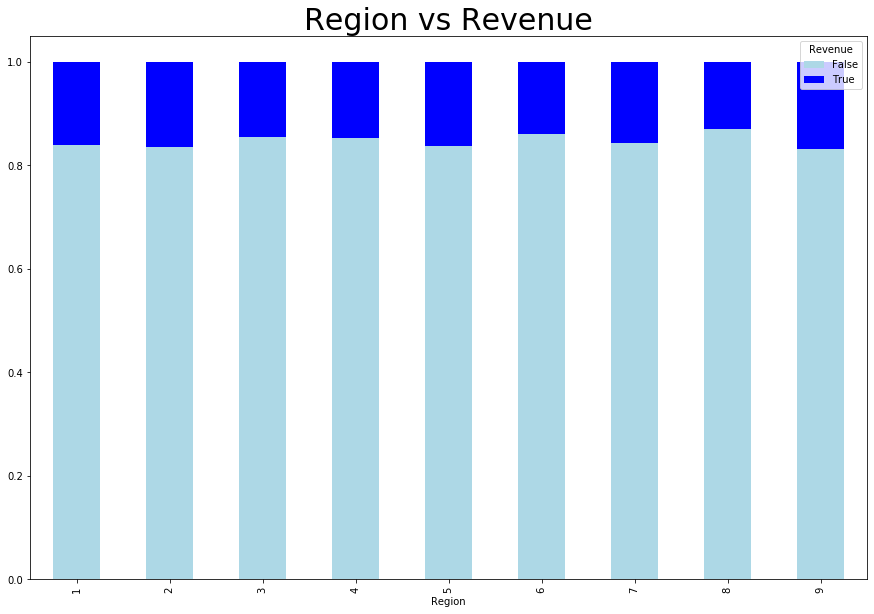

In [277]:
# region vs Revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

C:\Users\SINDHURA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1, 'LM Plot between Admistrative and Information')

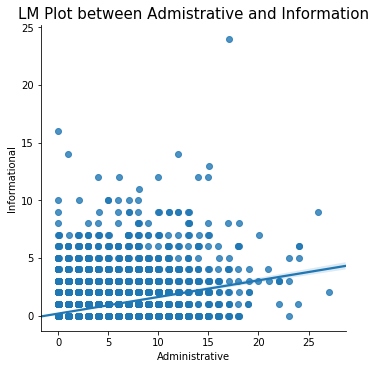

In [278]:
# lm plot

plt.rcParams['figure.figsize'] = (20, 10)

sns.lmplot(x = 'Administrative', y = 'Informational', data = data, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)


**Multi-Variate Analysis**

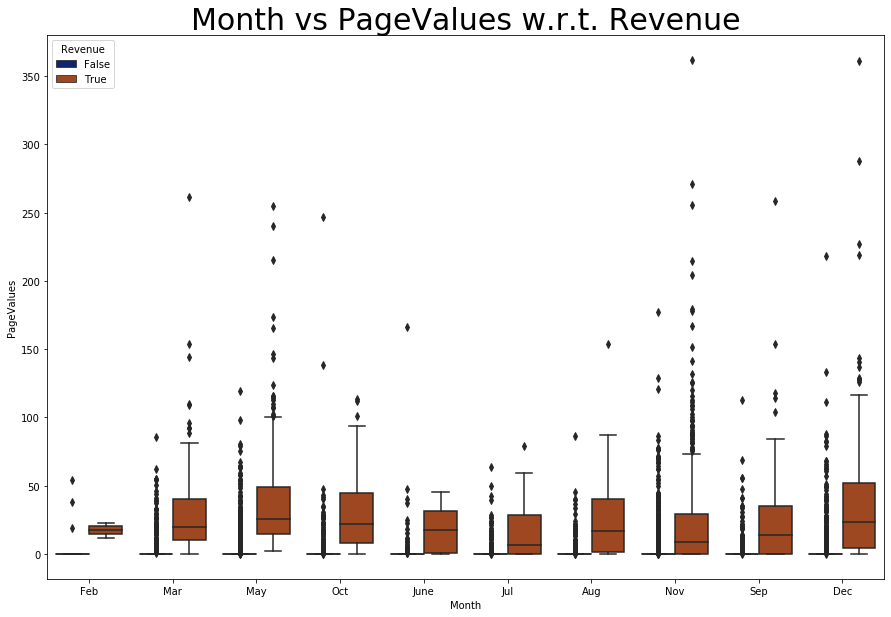

In [279]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'dark')
plt.title('Month vs PageValues w.r.t. Revenue', fontsize = 30)
plt.show()

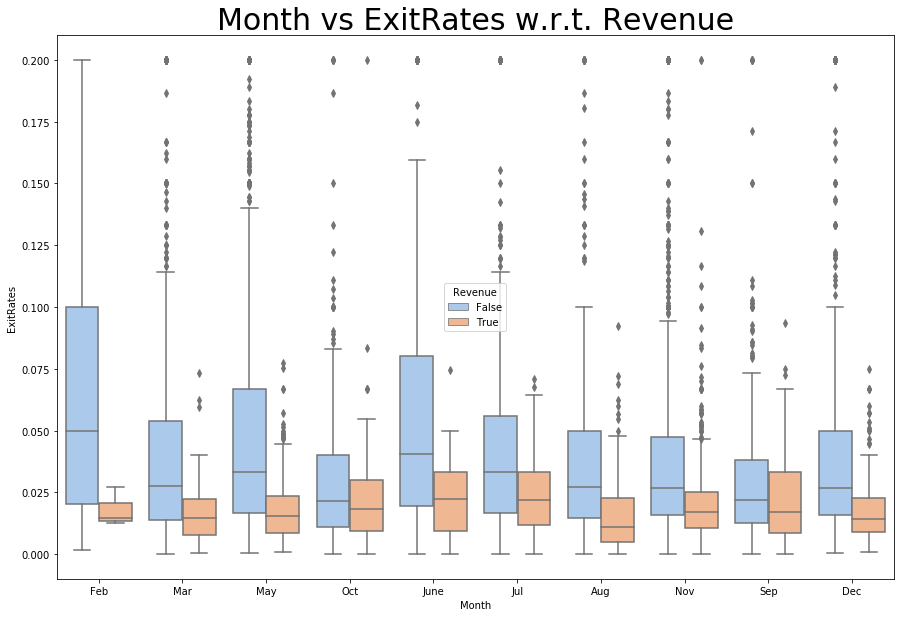

In [280]:
# month vs exit rates with respect to revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Month vs ExitRates w.r.t. Revenue', fontsize = 30)
plt.show()

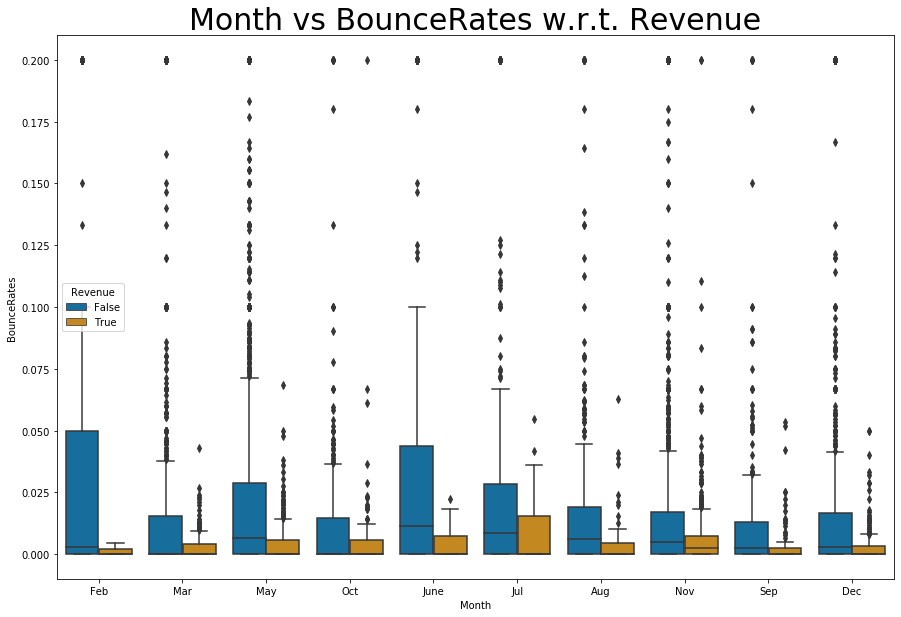

In [281]:
# month vs bouncerates wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Month vs BounceRates w.r.t. Revenue', fontsize = 30)
plt.show()

C:\Users\SINDHURA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


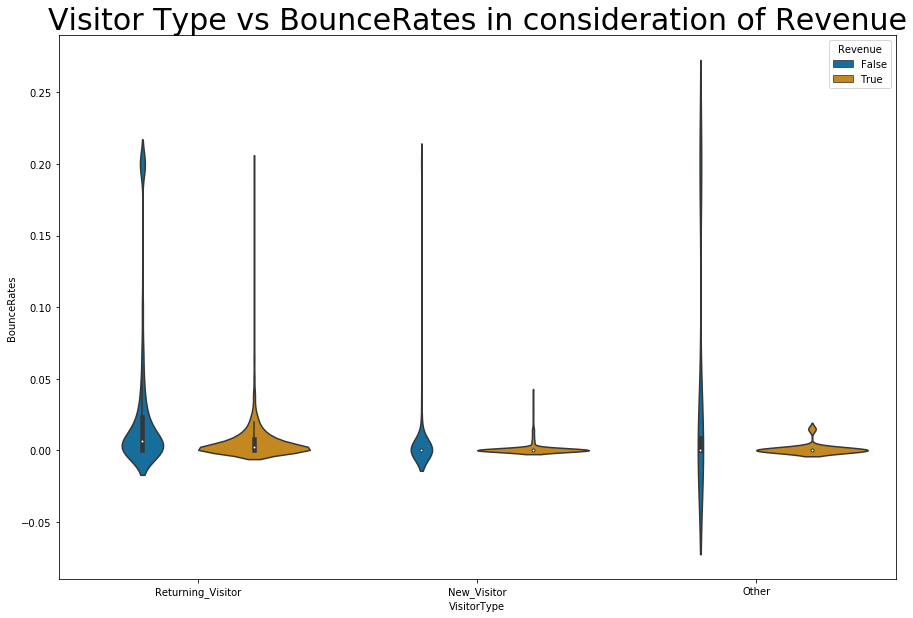

In [282]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Visitor Type vs BounceRates in consideration of Revenue', fontsize = 30)
plt.show()

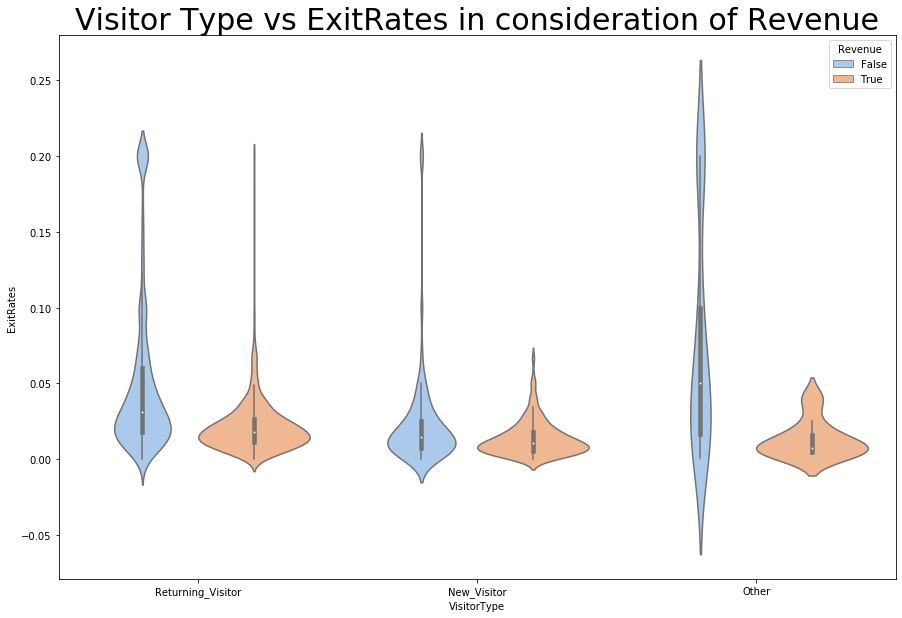

In [283]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Visitor Type vs ExitRates in consideration of Revenue', fontsize = 30)
plt.show()

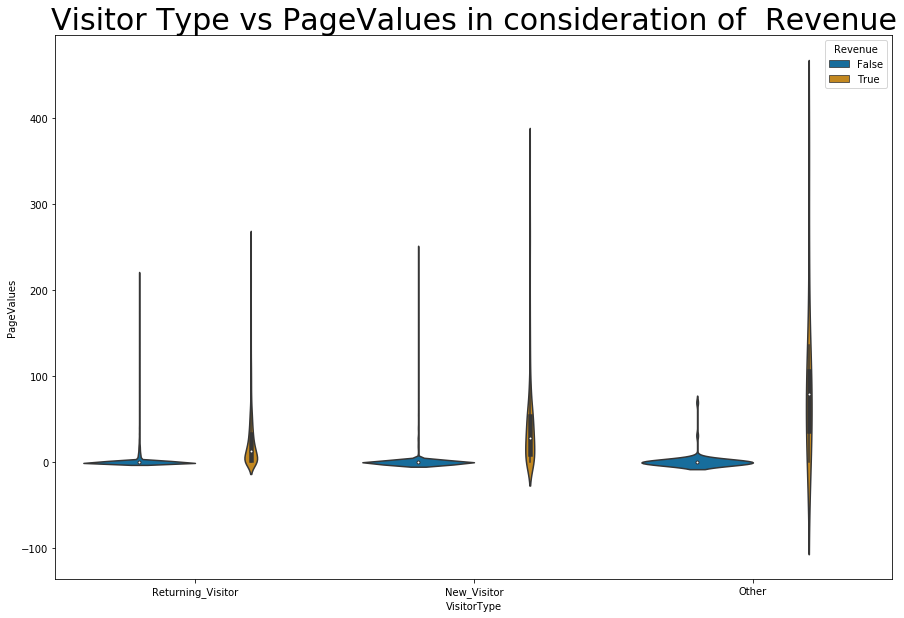

In [284]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Visitor Type vs PageValues in consideration of  Revenue', fontsize = 30)
plt.show()

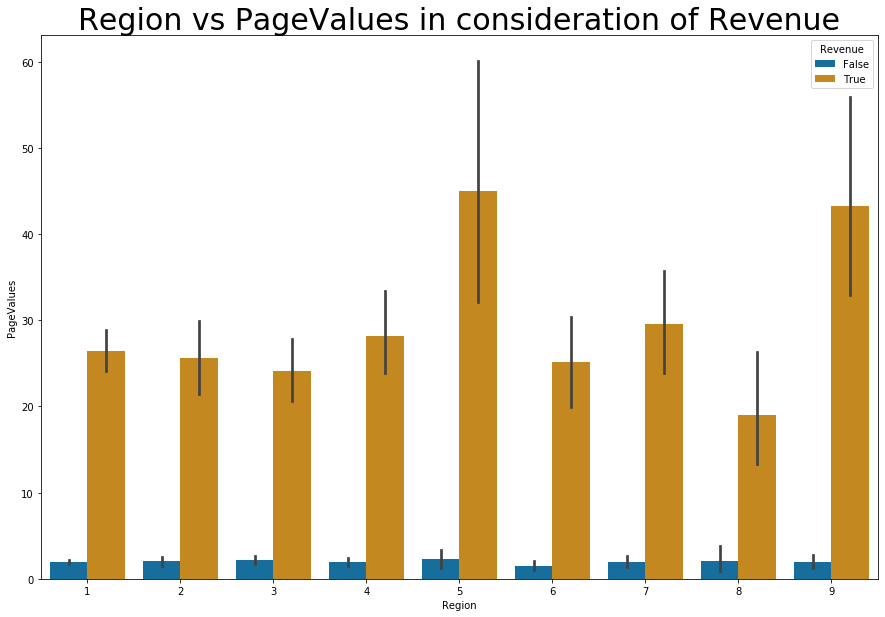

In [285]:
# region vs pagevalues w.r.t. revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Region vs PageValues in consideration of Revenue', fontsize = 30)
plt.show()

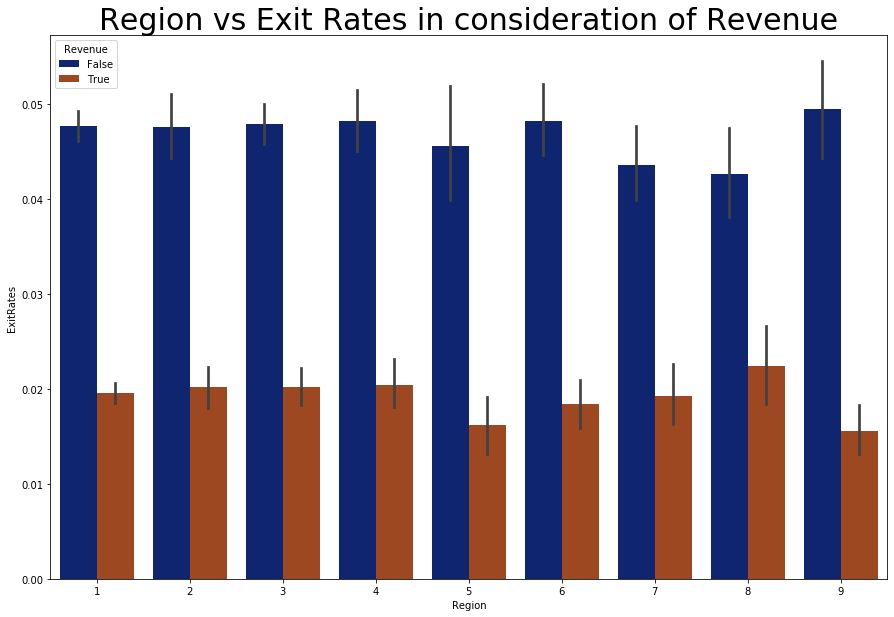

In [286]:
# region vs exit rates w.r.t. revenue


plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'dark')
plt.title('Region vs Exit Rates in consideration of Revenue', fontsize = 30)
plt.show()

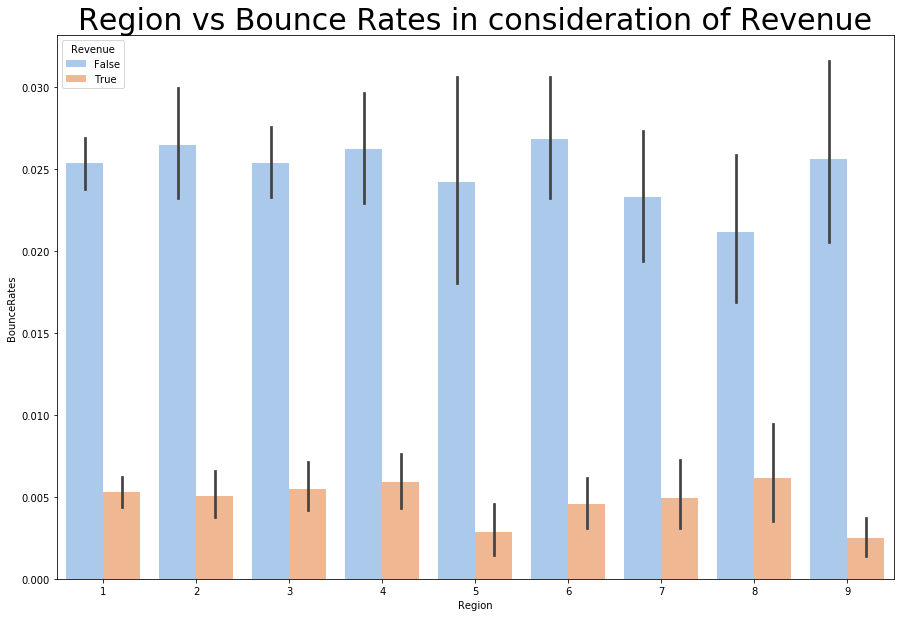

In [287]:
# region vs Bounce rates wrt revenue


plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['BounceRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Region vs Bounce Rates in consideration of Revenue', fontsize = 30)
plt.show()

In [288]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [289]:
# one hot encoding for categorical features

data1 = pd.get_dummies(data)

data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [290]:
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [291]:
# label encoding of revenue the target variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data1['Revenue'] = le.fit_transform(data['Revenue'])
data1['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

START OF MODELING:


<b> Balancing the Dataset for target variable Revenue as observed from above label encoding the Potential Revenue generating customer and non potential revenue genrating customer values are highly imbalanced. This might lead to high bias in model output prediction.Performing Undersamplling below.

After Balancing the dataset using Undersampling....


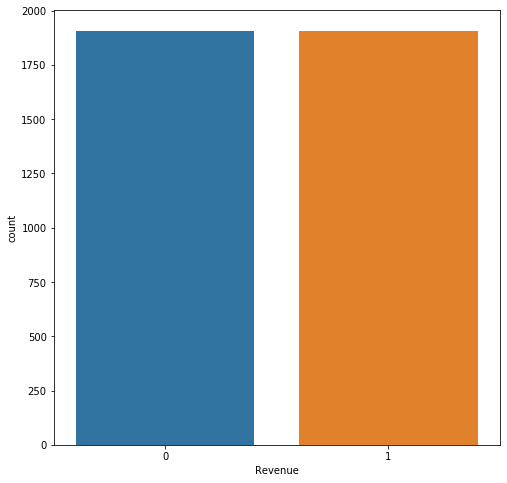

1    1908
0    1908
Name: Revenue, dtype: int64

In [292]:

sampled = data1.sample(frac=1,random_state=4)
#split sampled into two categories of revenue outcomes 1&2 and storing in category_1 and category_2 dataframes

category_1 = sampled.loc[sampled_data['Revenue'] == 1]
category2 = sampled_data.loc[sampled_data['Revenue'] == 0].sample(n=1908,random_state=42)
Final_data = pd.concat([revenue1_data, revenue0_data])
plt.figure(figsize=(8, 8))
print("After Balancing the dataset using Undersampling....")
sns.countplot('Revenue', data=Final_data)
plt.show()
Final_data['Revenue'].value_counts()

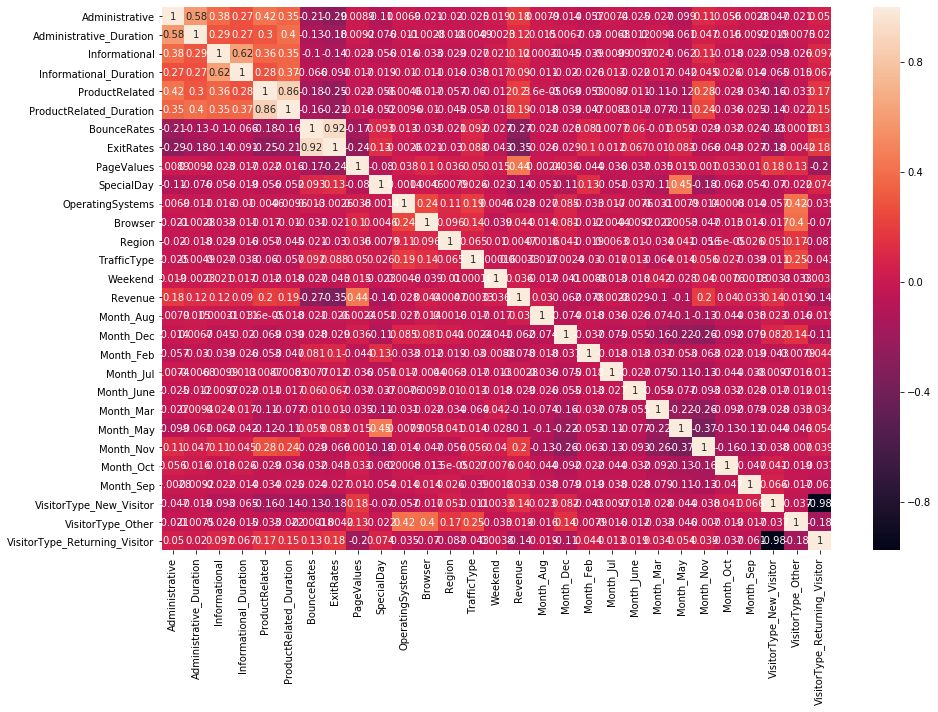

In [293]:
#plotting heatmap to find correlation between various predictors
sns.heatmap(Final_data.corr(), annot=True)


In [294]:
x = Final_data
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (3816, 28)
Shape of y: (12330,)


In [295]:
#selecting and droping upper traingle columns with corelation matrix value higher than 0.5
cor =Final_data.corr().abs()
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
new_data = [column for column in upper.columns if any(upper[column] > 0.50)]
new_data1=Final_data.drop(new_data, axis=1)
new_data2=new_data1[new_data1.columns[1:]].corr()['Revenue'][:].abs().sort_values(ascending=False).index[16:]
dataset =new_data1.drop(new_data2, axis=1)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 1490 to 9155
Data columns (total 17 columns):
Administrative             3816 non-null int64
Informational              3816 non-null int64
ProductRelated             3816 non-null int64
BounceRates                3816 non-null float64
PageValues                 3816 non-null float64
SpecialDay                 3816 non-null float64
Browser                    3816 non-null int64
Weekend                    3816 non-null bool
Revenue                    3816 non-null int64
Month_Dec                  3816 non-null uint8
Month_Feb                  3816 non-null uint8
Month_Mar                  3816 non-null uint8
Month_May                  3816 non-null uint8
Month_Nov                  3816 non-null uint8
Month_Oct                  3816 non-null uint8
Month_Sep                  3816 non-null uint8
VisitorType_New_Visitor    3816 non-null uint8
dtypes: bool(1), float64(3), int64(5), uint8(8)
memory usage: 461.9 KB


<b> Scaling the dataset using Standard scaler.

In [296]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= dataset.drop(['Revenue'], axis=1)
x = scaler.fit_transform(x)
y = dataset.Revenue

We are trying to predict potential revenue genrators of Business_Web_Customers.Dataset Analysis_of_Business_Web_Customers has total of 12,330 records and 18 features.There are no Missing values and there are 8 categorical types and 10 numeric types.Our target variable is Revenue.<br>

<b>Exploratory Data Analysis:<br></b>
1.The value added customers to the Revenue attribute are just around 2500 whereas non value added customers are around 9000.Since there is high imbalance in our target variable, I have chosen to balanace the Revenue feature by performing UnderSampling. <br>
2.Customers who more likely to visit more during week days as compared to weekends.Returnung visitors are around 85% of our dataset. They might be a good predictor variable.May and nov records a little high traffic, but other months are realtively close to each other.This might be due to special seasons. revenue obtained from special days and nov also making an impact<br> 
3.Revenue generated during Weekend or Weekday is almost similar.The returning visitor is giving more revenue to the shopping site which is also slightly higer than returning and other visitors.Almost all regions are performing well with region 9 slightly better.Returnung Visitors and BounceRates in consideration of Revenue are performing well. can be considered as a good predictor.Returnung Visitors and ExitRates in consideration of Revenue are performing well. can be considered as a good predictor<br>
4.People going surfing from Browser-2 are giving more revenue as compare to other.Similarly, Region with  PageValues around 45 in consideration of Revenue are generating more revenue.

5.Dummies are Generated for the all the features in the dataset and label encoding is done on targer variable revenue. It shows 10422 False values and 1908 True values. Asour targer variable  Revenue is not balanced, I am balancing the feature Revenue using UnderSampling. Finding a corelation between predictors and target Revenue to find best predictors.Finally applying standard scaling on the dataset before Modeling.


In [297]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (2671, 16)
Shape of y_train : (2671,)
Shape of x_test : (1145, 16)
Shape of y_test : (1145,)


Implementing a logistic regression model.  You will need to create a train and test set (70% 30%) before modeling.  Use a confusion matrix to evaluate your model.

In [298]:
# code for Question 2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [299]:
from sklearn.metrics import confusion_matrix
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(x_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.81
Accuracy of logistic regression classifier on train set: 0.81


In [300]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.79      0.84      0.81       563
          1       0.83      0.78      0.81       582

avg / total       0.81      0.81      0.81      1145

[[471  92]
 [127 455]]


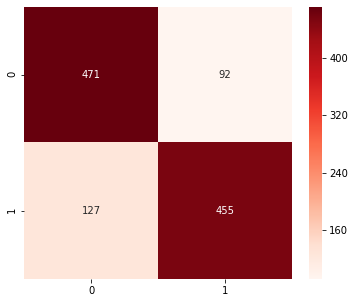

In [301]:
cf =confusion_matrix(y_test, y_pred)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Reds', annot=True, fmt='d')

Implementing a decision tree classifier.  Use a confusion matrix to evauate your model.

In [302]:
# code for Question 3
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x_train, y_train)
y_pred_dt = classifier.predict(x_test)

In [303]:
from sklearn.metrics import confusion_matrix
print("Training Accuracy :", classifier.score(x_train, y_train))
print("Testing Accuracy :", classifier.score(x_test, y_test))


Training Accuracy : 0.9970048670909771
Testing Accuracy : 0.7807860262008733


In [304]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

             precision    recall  f1-score   support

          0       0.78      0.77      0.78       563
          1       0.78      0.79      0.79       582

avg / total       0.78      0.78      0.78      1145

[[435 128]
 [123 459]]


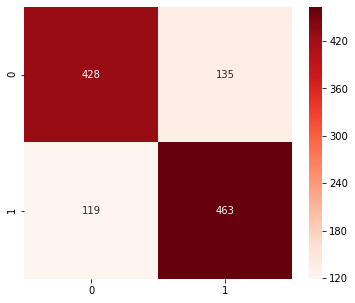

In [305]:
cf1=confusion_matrix(y_test, y_pred_dt)
TP=cf1[1][1]
TN=cf1[0][0]
FN=cf1[1][0]
FP=cf1[0][1]
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred_clf),cmap='Reds', annot=True, fmt='d')

In [306]:
precision=(TP/(TP+FP))
print("Precision : ", precision)
specificity=TN/(TN+FP)
print("Specificity : ", specificity)
recall=TP/(TP+FN)
print("Recall : ", recall)

Precision :  0.7819420783645656
Specificity :  0.7726465364120781
Recall :  0.788659793814433


Implementing a random forest classifier.  Use a confusion matrix to evaluate your model.

In [307]:
#code for question 4
from sklearn.ensemble import RandomForestClassifier


random_model = RandomForestClassifier()
random_model.fit(x_train, y_train)

y_pred_rf = random_model.predict(x_test)

In [308]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# evaluating the model
print("Training Accuracy :", random_model.score(x_train, y_train))
print("Testing Accuracy :",random_model.score(x_test, y_test))



Training Accuracy : 0.9853987270685136
Testing Accuracy : 0.8227074235807861


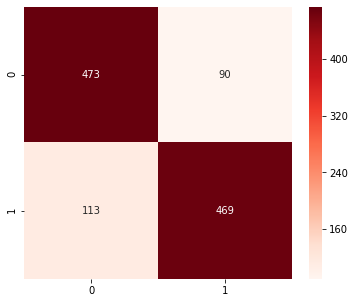

In [309]:
# confusion matrix

cf2=confusion_matrix(y_test, y_pred_rf)
TP=cf2[1][1]
TN=cf2[0][0]
FN=cf2[1][0]
FP=cf2[0][1]
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),cmap='Reds', annot=True, fmt='d')



In [310]:
# classification report
cr = classification_report(y_test, y_pred_rf)
print(cr)

             precision    recall  f1-score   support

          0       0.81      0.84      0.82       563
          1       0.84      0.81      0.82       582

avg / total       0.82      0.82      0.82      1145



<b>evidence of overfitting or underfitting can be known by finding testing and training errors of our models. Overfiting leads to poor generalization whcih is nothing but test error. If the model performs well on train data but poor on test data it is over fitting. And if the model performs poor on both train and test it is underfitting. 
    


In [311]:
# code for Question 5
from sklearn.metrics import accuracy_score, f1_score
pred_train= logreg.predict(x_train)
print("train data accuracy of Logistic Regression: " ,accuracy_score(y_train, pred_train))
print('F1 score on train data using Logistic Regression: ', f1_score(y_train, pred_train),"\n")
pred_test= logreg.predict(x_test)
print("test data accuracy of Logistic Regression: " ,accuracy_score(y_test, pred_test))
print('F1 score on test data using Logistic Regression: ', f1_score(y_test, pred_test),"\n")

pred_train= classifier.predict(x_train)
print("train data accuracy of Decision Tree: " ,accuracy_score(y_train, pred_train))
print('F1 score on train data using Decision Tree: ', f1_score(y_train, pred_train),"\n")
pred_test= classifier.predict(x_test)
print("test data accuracy of  Decision Tree: " ,accuracy_score(y_test, pred_test))
print('F1 score on test data using Decision Tree: ', f1_score(y_test, pred_test),"\n")

pred_train= random_model.predict(x_train)
print("train data accuracy of RandomForest: " ,accuracy_score(y_train, pred_train))
print('F1 score on train data using RandomForest: ', f1_score(y_train, pred_train),"\n")
pred_test= random_model.predict(x_test)
print("test data accuracy of  RandomForest: " ,accuracy_score(y_test, pred_test))
print('F1 score on test data using RandomForest: ', f1_score(y_test, pred_test))

train data accuracy of Logistic Regression:  0.814301759640584
F1 score on train data using Logistic Regression:  0.8041074249605057 

test data accuracy of Logistic Regression:  0.8087336244541484
F1 score on test data using Logistic Regression:  0.8060230292294065 

train data accuracy of Decision Tree:  0.9970048670909771
F1 score on train data using Decision Tree:  0.9969742813918305 

test data accuracy of  Decision Tree:  0.7807860262008733
F1 score on test data using Decision Tree:  0.7852865697177074 

train data accuracy of RandomForest:  0.9853987270685136
F1 score on train data using RandomForest:  0.985232866338508 

test data accuracy of  RandomForest:  0.8227074235807861
F1 score on test data using RandomForest:  0.8220858895705522


<b>From the above observations train data accuracy for random forest is 0.98 bust test data accuracy is just 0.84. this model is overfitting.
Similar is the case with Decision tree. Train accuracy is 0.99 but test accuracy is just 0.79.
in case of logistic regression train and test accuracy is similar. This implies that the model is not overfitting or underfitting.<br>
    
1.Ensembling models like Bagging attempts to reduce the chance overfitting complex models.

It trains a large number of "strong" learners in parallel.
A strong learner is a model that's relatively unconstrained.
Bagging then combines all the strong learners together in order to "smooth out" their predictions.
Boosting attempts to improve the predictive flexibility of simple models.

It trains a large number of "weak" learners in sequence.
A weak learner is a constrained model (i.e. you could limit the max depth of each decision tree).
Each one in the sequence focuses on learning from the mistakes of the one before it.
Boosting then combines all the weak learners into a single strong learner.


<b>2.Cross-validation is a powerful preventative measure against overfitting. initial training data is used  to generate multiple mini train-test splits.
these splits are used to tune our model.

In standard k-fold cross-validation, we partition the data into k subsets, called folds.
Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”).
Cross-validation allows you to tune hyperparameters with only your original training set.

analysis of this dataset in terms of data quality. Do you have the right data in order to make a predition for revenue?

The six core dimensions of data quality are:
Completeness.
Uniqueness.
Timeliness.
Validity.
Accuracy.
Consistency.
The data is complete with no missing values. Unique keys of customers are not provided in the datast by which we can uniquely identify a potential revenue generating customer.There is no feature timestamp provided in the dataset.The dataset provided is valid enough. As of now the data is generic about bussiness web customers and revenue generated by the customers who visited the page and and various other parameters. Cannot identify if the data is acccurate or not. same goes for consistency
Accuracy: We cant comment much about accuracy as we dont have much information about the domain of the data. 

Our models above are giving good accuracy scores for the given dataset, Hence  we can say that the data is good enough in order to make a predition for revenue

Upon observing the data and performing the EDA, I have understood to perform random sampling on dataset when the data is imbalanced as this might create bias in our final predicted model outcome. I learned that correlation between various features can be understood by plotting a heatmap which shows correlation matrix.This helps in knowing postive and negative correlated features that can act as predictors. Finally, i performed standard scaling on the data set which brings all the features to same scale which prevents any outliers present in the dataset, so that outliers does not effect our model.